In [1]:
# Importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data:
countries = pd.read_csv('Country-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
countries.shape

(167, 10)

## Cleaning the DataFrame:

In [4]:
# Checking the datatypes of each of the columns:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


The datatypes of all the columns look ok.

In [5]:
# Checking for null values:
countries.isnull().sum(axis='rows')

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# From the data dictionary it can be seen that the columns 'Exports', 'Imports' and 'Health' are given as 
# percentage of the GDP and therefore they need to be converted into the actual numerical values.
# This is done because the percentage values can be misleading.

# Exports:
countries['exports'] = countries['exports']*countries['gdpp']/100

# Imports:
countries['imports'] = countries['imports']*countries['gdpp']/100

# Health:
countries['health'] = countries['health']*countries['gdpp']/100

countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Outlier Analysis:

In [7]:
# List of all the columns of the dataset:
countries.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

0.00      2.60
0.25      8.25
0.50     19.30
0.75     62.10
0.90    100.22
0.95    116.00
0.98    145.16
0.99    153.40
1.00    208.00
Name: child_mort, dtype: float64


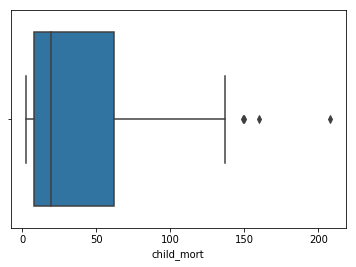

In [8]:
# Child_Mort:
sns.boxplot(x='child_mort', data = countries)
print(countries['child_mort'].quantile([0,0.25,0.5, 0.75, 0.90, 0.95, 0.98, 0.99, 1]))

We can see that there are a significant number of outliers for **Child_Mort** column.<br>
Let us take a look at the outliers.

In [9]:
countries[countries['child_mort'] > 116] # greater than 95 percentile

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399


The 8 countries listed above seem to be underdeveloped on account of their high child mortality rate and therefore it will be a huge loss for us wrt to information if we were to remove it now.<br>
Let us proceed with other columns.

0.00         1.07692
0.25       447.14000
0.50      1777.44000
0.75      7278.00000
0.90     17760.60000
0.95     31385.10000
0.98     46480.92800
0.99     64794.26000
1.00    183750.00000
Name: exports, dtype: float64


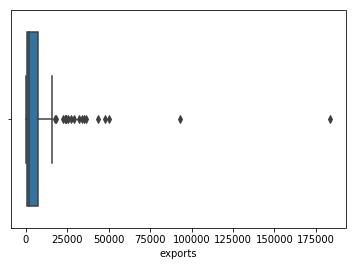

In [10]:
# Exports:
sns.boxplot(countries['exports'])
print(countries['exports'].quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 1]))

It can be seen that the values have a significant increase from the 98th to 99th percentile. <br>
Let us take a look at these values.

In [11]:
# Values greater than 95th percentile:
countries[countries['exports'] >  31385].sort_values('exports', ascending = False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
98,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100


From a glance we can see that these countries are higly developed and also a little small in size (geographically).<br>
This is also evident from the income and the life expectancy rate.<br>
We cannot remove all the countries since the quantity of data will get affected.<br>
However, there are some extreme outliers here such as **Luxemberg** and **Singapore**. Removal of these countries from the dataset will stabilize the data.

In [12]:
# Removing Luxembourg and Singapore:
countries = countries[~countries['country'].isin(['Luxembourg', 'Singapore'])]
countries.shape

(165, 10)

0.00      12.8212
0.25      76.8930
0.50     306.2500
0.75     939.9600
0.90    3614.6720
0.95    4845.3200
0.98    6436.6360
0.99    8415.4416
1.00    8663.6000
Name: health, dtype: float64


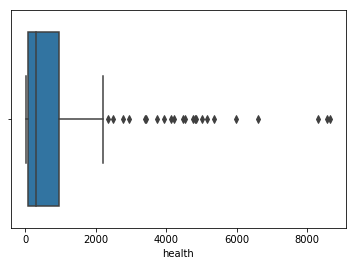

In [13]:
# Expenditure on Health:
sns.boxplot(countries['health'])
print(countries['health'].quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 1]))

There are some extreme outliers in this column too. Let us have a look at it.

In [14]:
# Countries with the extremely high values for health expenditure 
countries[countries['health'] >= 8000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
159,United States,7.3,6001.6,8663.60,7647.2,49400,1.220,78.7,1.93,48400


We can remove these countries to make our dataset more stable, since these countries have a very low child mortality rate and the income levels and the life expectancy are also reasonably high.

In [15]:
countries = countries[~countries['country'].isin(['Norway', 'Switzerland', 'United States'])]
countries.shape

(162, 10)

0.00        0.651092
0.25      571.837500
0.50     1981.770000
0.75     6356.390000
0.90    12432.380000
0.95    18121.065000
0.98    30516.184000
0.99    32756.392000
1.00    42125.500000
Name: imports, dtype: float64


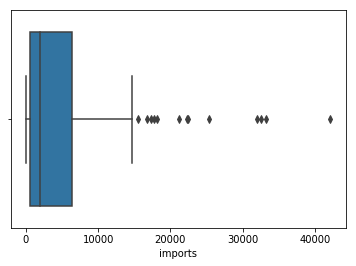

In [16]:
# Imports:
sns.boxplot(countries['imports'])
print(countries['imports'].quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 1]))

In [17]:
# Taking a look at the outlier countries:
countries[countries['imports'] > 20000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
98,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
144,Sweden,3.0,24070.2,5017.23,21204.7,42900,0.991,81.5,1.98,52100
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600,12.500,76.5,1.87,35000


The list of above countries makes sense since these are really small countries and therefore they are not self reliant in terms of many things and have to import it.<br>
It can also be seen that the **income** levels for these countries are almost the same except for Malta.<br> Child mortatility rate is also below the world average of 19 for all these countries.<br>
We will not remove these countries as of now.

0.00       609.0
0.25      3325.0
0.50      9925.0
0.75     21100.0
0.90     39700.0
0.95     43960.0
0.98     54982.0
0.99     77306.0
1.00    125000.0
Name: income, dtype: float64


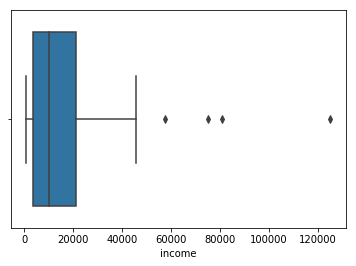

In [18]:
# Income per person:
sns.boxplot(countries['income'])
print(countries['income'].quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 1]))

In [19]:
countries[countries['income'] >  50000].sort_values('income', ascending = False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.98,79.5,2.07,70300
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.70,77.1,1.84,35300
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200,11.20,78.2,2.21,38500
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600,12.50,76.5,1.87,35000


It can be seen that all of these countries with exceptionally high net income are oil producing gulf countries.<br>
The child mortality rate is less and the life expectancy is high.<br>
Removing these countries is feasible for us.

In [20]:
# Removing the countries with a really high net income per person:
countries = countries[~countries['country'].isin(['Brunei','Kuwait','Qatar','United Arab Emirates'])]
countries.shape

(158, 10)

0.00     -4.2100
0.25      1.8575
0.50      5.2650
0.75     10.4750
0.90     16.7800
0.95     21.1250
0.98     26.2760
0.99     42.0810
1.00    104.0000
Name: inflation, dtype: float64


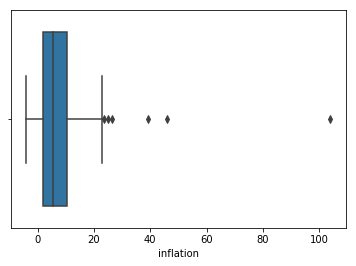

In [21]:
# Inflation:
sns.boxplot(countries['inflation'])
print(countries['inflation'].quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 1]))

By intuition we can say that a negative inflation rate and an inflation rate above 20% is suspicious.<br>
However a negative inflation rate is actually a good thing since the purchasing power of the money increases every year. Let us only focus on countries with a high inflation rate.<br>

In [22]:
countries[countries['inflation'] > 30]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
103,Mongolia,26.1,1237.55,144.160,1502.55,7710,39.2,66.2,2.64,2650
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.9,75.4,2.47,13500


We can see that the countries having a hight inflation rate are mostly poor countries except for **Venezuela** which has net income greater than 50 percentile of the world.<br>
Also the child mortality rate in Venenzuela is less than the world average of 19.<br>
Venezuela seems to be an outlier for this case.<br>
We however cannot remove **Nigeria** and **Mongolia** on account of their really high inflation rate since the child mortality rate is also through the charts for them and therefore it must require financial aid.

0.00    32.100
0.25    64.150
0.50    71.850
0.75    76.400
0.90    80.300
0.95    81.315
0.98    81.872
0.99    82.000
1.00    82.800
Name: life_expec, dtype: float64


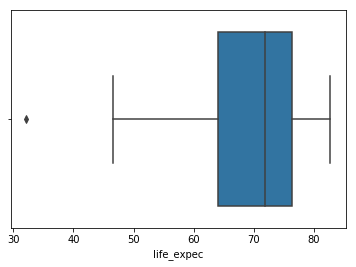

In [23]:
# Life Expectancy:
sns.boxplot(countries['life_expec'])
print(countries['life_expec'].quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 1]))

In [24]:
countries[countries['life_expec'] < 40]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662


We cannot remove these countries since these are precisely the countries we'd want to give financial assistance.

0.00    1.2300
0.25    1.8150
0.50    2.5300
0.75    4.2000
0.90    5.3460
0.95    5.9120
0.98    6.5008
0.99    6.5672
1.00    7.4900
Name: total_fer, dtype: float64


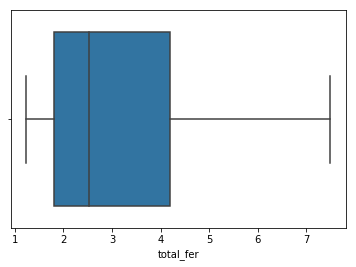

In [25]:
# Total Fertility:
sns.boxplot(countries['total_fer'])
print(countries['total_fer'].quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 1]))

In [26]:
countries[countries['total_fer'] > 5.5].sort_values('total_fer', ascending = False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.39,56.5,6.59,897
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
149,Timor-Leste,62.6,79.2000,328.3200,1000.800,1850,26.50,71.1,6.23,3600
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.40,60.1,6.16,3530
155,Uganda,81.0,101.7450,53.6095,170.170,1540,10.60,56.8,6.15,595
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575
113,Nigeria,130.0,589.4900,118.1310,405.420,5150,104.00,60.5,5.84,2330


From a glance it can be seen that the countries featuring above are all poor countries with low income per capita and high child mortality rate.<br>
We need these countries to be in our dataframe since we'd want to give them financial aid.

0.00      231.0
0.25     1310.0
0.50     4480.0
0.75    12075.0
0.90    31670.0
0.95    44755.0
0.98    50076.0
0.99    51986.0
1.00    58000.0
Name: gdpp, dtype: float64


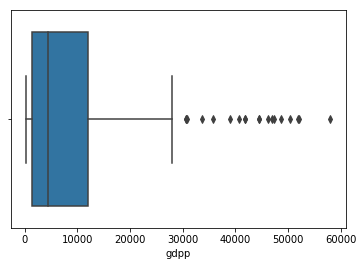

In [27]:
# GDPP:
sns.boxplot(countries['gdpp'])
print(countries['gdpp'].quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99, 1]))

In [28]:
countries[countries['gdpp'] > 50000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
144,Sweden,3.0,24070.2,5017.23,21204.7,42900,0.991,81.5,1.98,52100


Although these countries have a higher per capita GDP, it can be seen that their net income per person lies between the 75th and the 95th percentile.<br>
Let us not remove these countries as of now.

In [29]:
# Resetting the index of the DataFrame:
countries = countries.reset_index(drop= True)

We started off with 167 countries and now we are down to 158. Let us proceed with the data preparation.

## Data Preparation:

In [30]:
countries.describe()
# The columns in the data are on different scales and the variation in the values is high.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.073418,4767.262959,862.886361,4664.932925,13884.575949,7.855222,70.035443,3.013544,10275.405063
std,40.723066,7725.026618,1414.962144,6981.810546,12922.625089,10.782475,8.849557,1.528920,13694.352433
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.230000,231.000000
25%,10.050000,428.284500,67.989000,536.700000,3290.000000,1.857500,64.150000,1.815000,1310.000000
50%,20.900000,1634.595000,273.188000,1823.400000,9790.000000,5.265000,71.850000,2.530000,4480.000000
75%,62.500000,5629.750000,812.497500,5872.430000,20100.000000,10.475000,76.400000,4.200000,12075.000000
max,208.000000,50161.000000,6612.000000,42125.500000,45700.000000,104.000000,82.800000,7.490000,58000.000000


In [31]:
# importing the Standardization library:
from sklearn.preprocessing import StandardScaler

In [32]:
# Instantiating the scaler variable:
scaler = StandardScaler()

# Fit and Transform:
scaled_df = scaler.fit_transform(countries[['child_mort', 'exports', 'health', 'imports', 'income',
                                             'inflation', 'life_expec', 'total_fer', 'gdpp']])

In [33]:
# Converting the scaled variables into a dataframe:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,1.234828,-0.611900,-0.582050,-0.634603,-0.952872,0.147445,-1.568376,1.841418,-0.712215
1,-0.578249,-0.470365,-0.421837,-0.384672,-0.306993,-0.313093,0.710146,-0.894671,-0.453112
2,-0.314663,-0.396676,-0.479912,-0.469058,-0.076432,0.767077,0.732818,-0.081062,-0.426007
3,1.944292,-0.333493,-0.540442,-0.452688,-0.619840,1.353217,-1.126275,2.064504,-0.494135
4,-0.733444,0.101777,-0.090201,0.362210,0.404872,-0.596859,0.766825,-0.579726,0.140986


In [34]:
# Dropping redundant variables from the dataframe:
countries = countries.drop(['child_mort', 'exports', 'health', 'imports', 'income',
                'inflation', 'life_expec', 'total_fer', 'gdpp'], 1)
countries.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [35]:
# Concantenating the two dataframes to get the final scaled dataframe:
countries = pd.concat([countries, scaled_df], axis=1)
countries.head()

,country,0,1,2,3,4,5,6,7,8
0,Afghanistan,1.234828,-0.611900,-0.582050,-0.634603,-0.952872,0.147445,-1.568376,1.841418,-0.712215
1,Albania,-0.578249,-0.470365,-0.421837,-0.384672,-0.306993,-0.313093,0.710146,-0.894671,-0.453112
2,Algeria,-0.314663,-0.396676,-0.479912,-0.469058,-0.076432,0.767077,0.732818,-0.081062,-0.426007
3,Angola,1.944292,-0.333493,-0.540442,-0.452688,-0.619840,1.353217,-1.126275,2.064504,-0.494135
4,Antigua and Barbuda,-0.733444,0.101777,-0.090201,0.362210,0.404872,-0.596859,0.766825,-0.579726,0.140986


In [36]:
# Renaming the columns:
countries.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
                     'inflation', 'life_expec', 'total_fer', 'gdpp']

countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.234828,-0.611900,-0.582050,-0.634603,-0.952872,0.147445,-1.568376,1.841418,-0.712215
1,Albania,-0.578249,-0.470365,-0.421837,-0.384672,-0.306993,-0.313093,0.710146,-0.894671,-0.453112
2,Algeria,-0.314663,-0.396676,-0.479912,-0.469058,-0.076432,0.767077,0.732818,-0.081062,-0.426007
3,Angola,1.944292,-0.333493,-0.540442,-0.452688,-0.619840,1.353217,-1.126275,2.064504,-0.494135
4,Antigua and Barbuda,-0.733444,0.101777,-0.090201,0.362210,0.404872,-0.596859,0.766825,-0.579726,0.140986


In [37]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,-1.124276e-16,-5.832184e-17,2.599889e-17,-4.567373e-17,3.583631e-17,-1.644254e-16,-2.029319e-15,1.728575e-16,3.583631e-17
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-9.231272e-01,-6.189417e-01,-6.026791e-01,-6.701861e-01,-1.030579e+00,-1.122524e+00,-4.300336e+00,-1.170248e+00,-7.358028e-01
25%,-7.396025e-01,-5.634641e-01,-5.635662e-01,-5.931641e-01,-8.224539e-01,-5.580159e-01,-6.671697e-01,-7.864085e-01,-6.567607e-01
50%,-4.723216e-01,-4.068114e-01,-4.180843e-01,-4.082849e-01,-3.178607e-01,-2.409890e-01,2.056969e-01,-3.172710e-01,-4.245423e-01
75%,5.524606e-01,1.120034e-01,-3.572469e-02,1.734989e-01,4.825016e-01,2.437389e-01,7.214818e-01,7.784767e-01,1.318293e-01
max,4.136735e+00,5.894876e+00,4.076006e+00,5.382512e+00,2.469822e+00,8.945115e+00,1.446981e+00,2.937165e+00,3.496065e+00


## Checking the correlation:

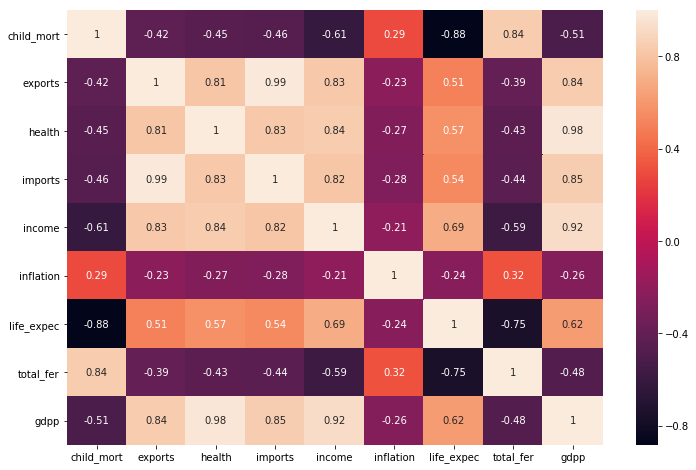

In [38]:
plt.figure(figsize = (12,8))
sns.heatmap(countries.corr(), annot = True)

We can see that there is a really high correlation between some of the variables.

## Principal Component Analysis:

In [39]:
# Importing the PCA library:
from sklearn.decomposition import PCA

In [40]:
# Since we can only have numerical data for doing PCA, let us filter it out in a new DataFrame:
countries_pca = countries[['child_mort', 'exports', 'health', 'imports', 'income',
                           'inflation', 'life_expec', 'total_fer', 'gdpp']]
countries_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234828,-0.611900,-0.582050,-0.634603,-0.952872,0.147445,-1.568376,1.841418,-0.712215
1,-0.578249,-0.470365,-0.421837,-0.384672,-0.306993,-0.313093,0.710146,-0.894671,-0.453112
2,-0.314663,-0.396676,-0.479912,-0.469058,-0.076432,0.767077,0.732818,-0.081062,-0.426007
3,1.944292,-0.333493,-0.540442,-0.452688,-0.619840,1.353217,-1.126275,2.064504,-0.494135
4,-0.733444,0.101777,-0.090201,0.362210,0.404872,-0.596859,0.766825,-0.579726,0.140986


In [41]:
# Initializing PCA:
pca = PCA(svd_solver='randomized', random_state = 42)

# Fitting PCA:
pca.fit(countries_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [42]:
# Taking a look at the components:
pca.components_

array([[-0.3068952 ,  0.35755597,  0.36593942,  0.36544719,  0.38437121,
        -0.14721684,  0.33159195, -0.29150399,  0.38231392],
       [ 0.50411737,  0.3264987 ,  0.26470913,  0.28966821,  0.10800087,
         0.1848366 , -0.37500439,  0.49417982,  0.2336984 ],
       [-0.13119581, -0.01468375, -0.0278924 , -0.05580872,  0.12736995,
         0.95986332,  0.19361876, -0.05740054,  0.01832203],
       [-0.07662863,  0.51619767, -0.47670585,  0.49543963, -0.16293591,
         0.05858705, -0.14341677, -0.20172251, -0.40462109],
       [ 0.22483067, -0.10188925,  0.10618318, -0.09799774,  0.15894166,
         0.07990059, -0.59324883, -0.72412743,  0.10119319],
       [ 0.04603657,  0.00803883, -0.49301135, -0.1736141 ,  0.82624913,
        -0.10850827, -0.04252363,  0.16236681, -0.044509  ],
       [-0.75889205, -0.01009648,  0.08217532, -0.03218945,  0.00848417,
         0.02764331, -0.5806242 ,  0.27193957,  0.0654236 ],
       [ 0.0023947 , -0.51398865, -0.41921115,  0.52156555, -0

As seen above, we have a total of 9 components which are the same as the number of features for all the countries.

In [43]:
# Let us take a look at the variance that is being explained by each of the components:
pca.explained_variance_ratio_

array([0.6523095 , 0.16102346, 0.09878039, 0.03666873, 0.02567212,
       0.01399565, 0.00956569, 0.00112881, 0.00085565])

In [44]:
# Cumulative sum of the variance:
np.cumsum(pca.explained_variance_ratio_)

array([0.6523095 , 0.81333296, 0.91211335, 0.94878208, 0.9744542 ,
       0.98844984, 0.99801554, 0.99914435, 1.        ])

We can see that 3 PC's are able to explain about 91% of the variance and 4 PC's can explain around 95% of the variance.

In [45]:
# Let us try visualizing the PC's:
feature = countries_pca.columns

pca_df = pd.DataFrame({'Feature' : feature, 'PC1' : pca.components_[0], 'PC2' :pca.components_[1],
                      'PC3' : pca.components_[2], 'PC4' : pca.components_[3], 'PC5': pca.components_[4],
                      'PC6' : pca.components_[5], 'PC7' : pca.components_[6], 'PC8': pca.components_[7],
                      'PC9' : pca.components_[8]})

pca_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,child_mort,-0.306895,0.504117,-0.131196,-0.076629,0.224831,0.046037,-0.758892,0.002395,-0.002378
1,exports,0.357556,0.326499,-0.014684,0.516198,-0.101889,0.008039,-0.010096,-0.513989,0.473439
2,health,0.365939,0.264709,-0.027892,-0.476706,0.106183,-0.493011,0.082175,-0.419211,-0.362167
3,imports,0.365447,0.289668,-0.055809,0.495440,-0.097998,-0.173614,-0.032189,0.521566,-0.470270
4,income,0.384371,0.108001,0.127370,-0.162936,0.158942,0.826249,0.008484,-0.107640,-0.279670
5,inflation,-0.147217,0.184837,0.959863,0.058587,0.079901,-0.108508,0.027643,0.019385,-0.009722
6,life_expec,0.331592,-0.375004,0.193619,-0.143417,-0.593249,-0.042524,-0.580624,-0.019705,0.009834
7,total_fer,-0.291504,0.494180,-0.057401,-0.201723,-0.724127,0.162367,0.271940,0.009029,-0.045484
8,gdpp,0.382314,0.233698,0.018322,-0.404621,0.101193,-0.044509,0.065424,0.524985,0.585710


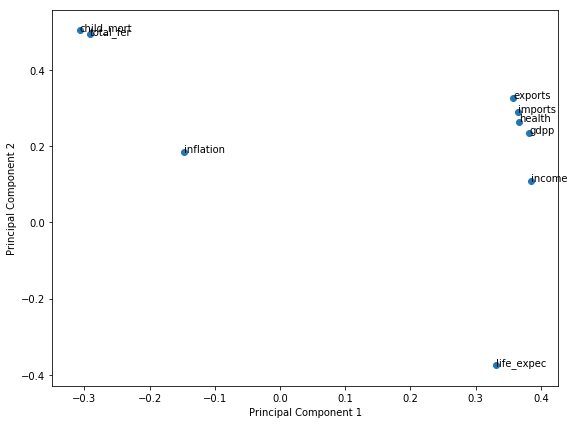

In [46]:
# PC1 and PC2:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

We can see that the 2nd component has a heavy weightage for Child Mortaility rate and the Total Fertility whereas the 1st component is about a long life expectancy.

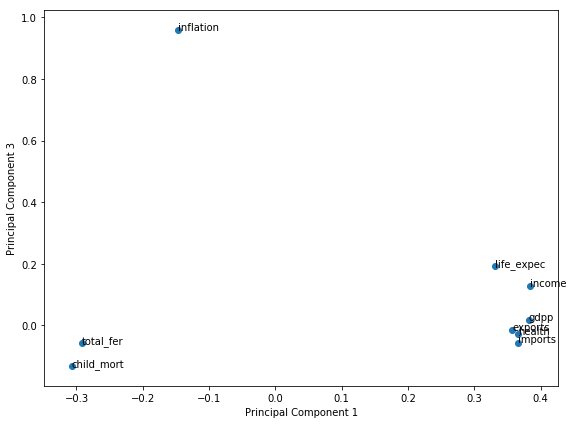

In [47]:
# PC1 and PC3:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(pca_df.PC1, pca_df.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC3[i]))
plt.tight_layout()
plt.show()

PC3 tends towards a higher inflation rate and low child mortality and total fetility whereas PC1 tends towards higher income and a higher life expectancy.

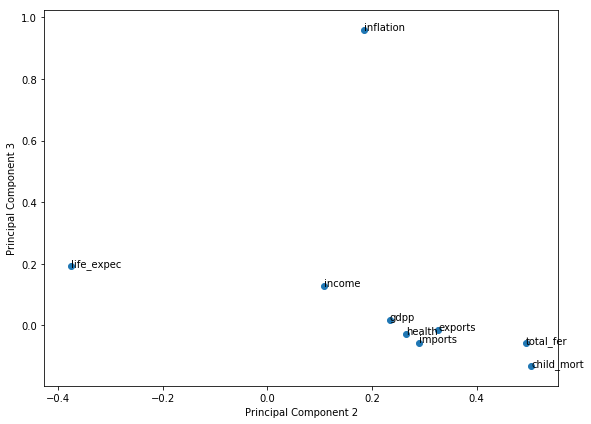

In [48]:
# PC2 and PC3:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(pca_df.PC2, pca_df.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC2[i],pca_df.PC3[i]))
plt.tight_layout()
plt.show()

Let us now make a **Scree plot** to get the required number of PC's:

Text(0,0.5,'% Variance')

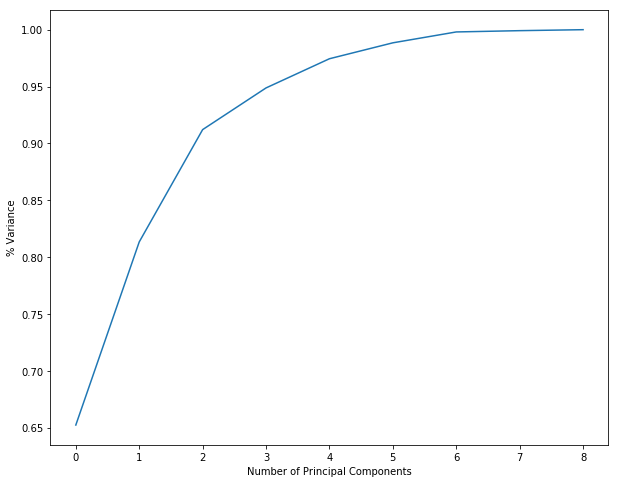

In [49]:
# Scree plot to assess the number of principal components required:
plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('% Variance')

Here again we can see that 3 PC's are enough to account for 91% of the variance.<br>
Let us take 3 Principal components for our analysis.

In [50]:
# Importing the incremental PCA library:
from sklearn.decomposition import IncrementalPCA

In [51]:
# Instantiating the PCA variable with 3 components:
pca_i = IncrementalPCA(n_components=3)

# Fit and Transform:
countries_pca = pca_i.fit_transform(countries_pca)

In [52]:
pd.DataFrame(countries_pca).head()

,0,1,2
0,-2.759700,1.342397,-0.480798
1,-0.034525,-1.573664,-0.053888
2,-0.430984,-0.834380,0.964532
3,-2.680948,2.106209,0.690726
4,1.081375,-0.863563,-0.262132


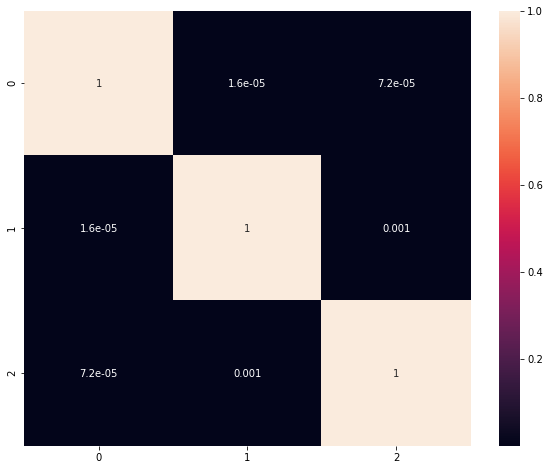

In [53]:
# Checking the correlation again:
corrmat = np.corrcoef(countries_pca.transpose())
plt.figure(figsize = (10,8))
sns.heatmap(corrmat, annot = True)

We can see that the correlation is almost 0 between the components. Therefore we no longer have multicollinearity in our dataset.

In [54]:
# Making a final DataFrame with the required Principal Components:
countries_pca = pd.DataFrame(countries_pca)
countries_pca.columns = ['PC1', 'PC2', 'PC3']
countries_pca.head()

,PC1,PC2,PC3
0,-2.759700,1.342397,-0.480798
1,-0.034525,-1.573664,-0.053888
2,-0.430984,-0.834380,0.964532
3,-2.680948,2.106209,0.690726
4,1.081375,-0.863563,-0.262132


In [55]:
# Assigning country names: 
country_name = countries['country']

# Concatenating the two:
countries_pca = pd.concat([country_name, countries_pca], 1)

countries_pca.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.759700,1.342397,-0.480798
1,Albania,-0.034525,-1.573664,-0.053888
2,Algeria,-0.430984,-0.834380,0.964532
3,Angola,-2.680948,2.106209,0.690726
4,Antigua and Barbuda,1.081375,-0.863563,-0.262132


Now that we have a final dataframe with all the required Principal Components, let us move forward with Clustering.

## Clustering:
### K-Means Clustering

In [56]:
# Importing the Kmeans library:
from sklearn.cluster import KMeans

In [57]:
# Making a new dataframe containing only the Principal Components:
Prin_Comp_df = countries_pca[['PC1', 'PC2', 'PC3']]
Prin_Comp_df.head()

,PC1,PC2,PC3
0,-2.759700,1.342397,-0.480798
1,-0.034525,-1.573664,-0.053888
2,-0.430984,-0.834380,0.964532
3,-2.680948,2.106209,0.690726
4,1.081375,-0.863563,-0.262132


In [58]:
# Choosing the optimal number of clusters using Elbow-Curve:
range_cluster = [2, 3, 4, 5, 6, 7, 8, 9]

ssd = []

# Running a loop so that we can form clusters with different values of n_clusters:
for i in range_cluster:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(Prin_Comp_df)
    
    # Inertia gives the squared sum of distances of all points in the dataset to its nearest cluster.
    # It is a single number.
    ssd.append(kmeans.inertia_)

In [59]:
elbow_df = pd.DataFrame({'Number of clusters' : range_cluster, 
                        'SSD' : ssd})
elbow_df

,Number of clusters,SSD
0,2,658.357225
1,3,382.508840
2,4,293.945381
3,5,219.886548
4,6,175.743689
5,7,151.958911
6,8,126.636015
7,9,108.321336


Text(0,0.5,'Squared Sum of Distance')

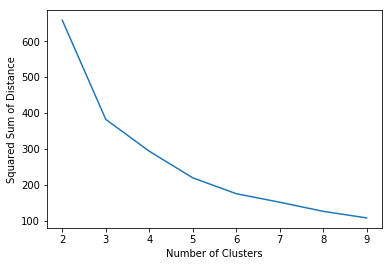

In [60]:
plt.plot('Number of clusters', 'SSD', data = elbow_df)
plt.xlabel('Number of Clusters')
plt.ylabel('Squared Sum of Distance')

We can see that for 3 and 5 clusters the drop in SSD is significant and therefore they might be good choices.<br>
However, we should also look at the Silhouette score of these clusters.

In [61]:
from sklearn.metrics import silhouette_score

In [62]:
# defining the range of clusters:
range_n_clusters = [2,3,4,5, 6, 7, 8, 9]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(Prin_Comp_df)
    # cluster labels:
    cluster_labels = kmeans.labels_
    # silhouette score:
    silhouette = silhouette_score(Prin_Comp_df, cluster_labels)
    print('For n_clusters={0}, the silhouette score is {1}'.format(i, silhouette))

For n_clusters=2, the silhouette score is 0.5302765196545758
For n_clusters=3, the silhouette score is 0.4855275319627071
For n_clusters=4, the silhouette score is 0.4588683041367635
For n_clusters=5, the silhouette score is 0.4664477080817533
For n_clusters=6, the silhouette score is 0.40038415919380554
For n_clusters=7, the silhouette score is 0.4135400104800131
For n_clusters=8, the silhouette score is 0.3879543166619689
For n_clusters=9, the silhouette score is 0.35844593001946834


We can see that the Silhoutte score is the highest for 2 clusters.<br>
Combining our knowledge from the Elbow-curve analysis, we can say that 3 clusters would be the best choice in this scenario.<br>
Let us go with 3 clusters for now.

In [63]:
# Final model with 3 clusters:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(Prin_Comp_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [64]:
# Taking a look at the lables:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1,
       0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2,
       1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 2, 2], dtype=int32)

In [65]:
# Assigning the Cluster labels to the countries dataframe:
countries_pca['Cluster_ID'] = kmeans.labels_
countries_pca.head()

,country,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,-2.759700,1.342397,-0.480798,2
1,Albania,-0.034525,-1.573664,-0.053888,0
2,Algeria,-0.430984,-0.834380,0.964532,0
3,Angola,-2.680948,2.106209,0.690726,2
4,Antigua and Barbuda,1.081375,-0.863563,-0.262132,0


In [66]:
# Taking a look at the ditribution of the clusters:
countries_pca['Cluster_ID'].value_counts()

0    83
2    46
1    29
Name: Cluster_ID, dtype: int64

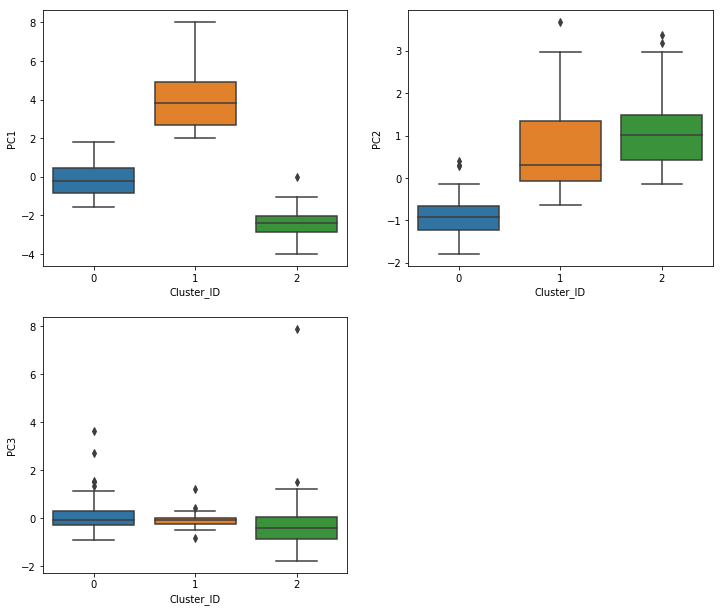

In [67]:
# Visualizing the clusters:
plt.figure(figsize = (12, 16))
plt.subplot(321)
sns.boxplot('Cluster_ID', 'PC1', data = countries_pca)
plt.subplot(322)
sns.boxplot('Cluster_ID', 'PC2', data = countries_pca)
plt.subplot(323)
sns.boxplot('Cluster_ID', 'PC3', data = countries_pca)

We can see that there is a clear difference between the 3 clusters for the principal components.

Let us proceed with Heirarchichal Clustering
## Heirarchical Clustering:

In [68]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

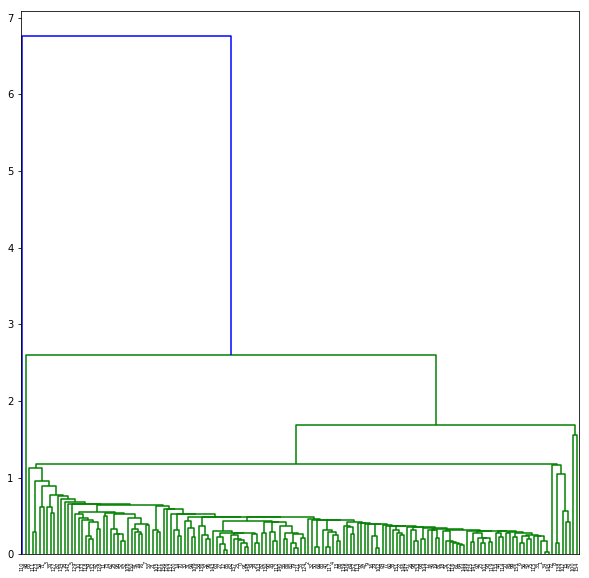

In [69]:
# Single Linkage Clustering:
plt.figure(figsize = (10,10))
mergings_single = linkage(Prin_Comp_df, method = 'single', metric = 'euclidean')
dendrogram(mergings_single)
plt.show()

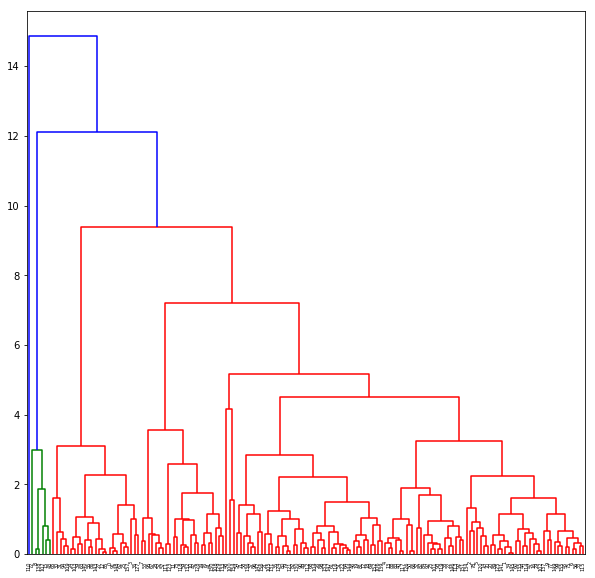

In [70]:
# Complete Linkage Clustering:
plt.figure(figsize = (10,10))
mergings_complete = linkage(Prin_Comp_df, method = 'complete', metric = 'euclidean')
dendrogram(mergings_complete)
plt.show()

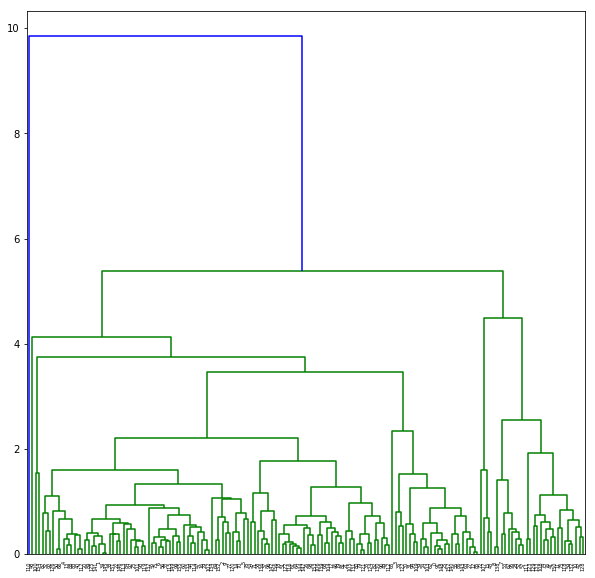

In [71]:
# Average Linkage Clustering:
plt.figure(figsize = (10,10))
mergings_average = linkage(Prin_Comp_df, method = 'average', metric = 'euclidean')
dendrogram(mergings_average)
plt.show()

Going with our previous analysis, we'll cut the dendrogram at 3 clusters.

In [72]:
# Getting the Cluster ID using the complete linkage since it seems clear:
hier_cluster_ID = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
hier_cluster_ID.shape

(158,)

In [73]:
# Assigning the Cluster_ID to the dataframe:
countries_pca['Hier_Cluster_ID_complete'] = hier_cluster_ID
countries_pca.head()

,country,PC1,PC2,PC3,Cluster_ID,Hier_Cluster_ID_complete
0,Afghanistan,-2.759700,1.342397,-0.480798,2,0
1,Albania,-0.034525,-1.573664,-0.053888,0,0
2,Algeria,-0.430984,-0.834380,0.964532,0,0
3,Angola,-2.680948,2.106209,0.690726,2,0
4,Antigua and Barbuda,1.081375,-0.863563,-0.262132,0,0


In [74]:
# Looking at the distribution of the Heir_cluster_ID
countries_pca['Hier_Cluster_ID_complete'].value_counts()

0    151
1      6
2      1
Name: Hier_Cluster_ID_complete, dtype: int64

We can see that the Heirarchical clustering fails to deliver the results since most of the countries are being grouped into 1 cluster.<br>
To get a more balanced distribution, we need to increase the number of clusters and that does not seem like a good idea in this use case since having more than 3 categories of countries would over complicate things.<br>
Therefore let us go with the results we got from K-Means Clustering.

In [75]:
# Dropping the Heir_Cluster_ID column:
countries_pca.drop('Hier_Cluster_ID_complete', axis = 'columns', inplace = True)
countries_pca.head()

,country,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,-2.759700,1.342397,-0.480798,2
1,Albania,-0.034525,-1.573664,-0.053888,0
2,Algeria,-0.430984,-0.834380,0.964532,0
3,Angola,-2.680948,2.106209,0.690726,2
4,Antigua and Barbuda,1.081375,-0.863563,-0.262132,0


Let us now merge the initial dataframe containing all the columns with the one above.

In [76]:
countries_final = pd.merge(countries, countries_pca, on='country', how='inner') 
countries_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,Cluster_ID
0,Afghanistan,1.234828,-0.611900,-0.582050,-0.634603,-0.952872,0.147445,-1.568376,1.841418,-0.712215,-2.759700,1.342397,-0.480798,2
1,Albania,-0.578249,-0.470365,-0.421837,-0.384672,-0.306993,-0.313093,0.710146,-0.894671,-0.453112,-0.034525,-1.573664,-0.053888,0
2,Algeria,-0.314663,-0.396676,-0.479912,-0.469058,-0.076432,0.767077,0.732818,-0.081062,-0.426007,-0.430984,-0.834380,0.964532,0
3,Angola,1.944292,-0.333493,-0.540442,-0.452688,-0.619840,1.353217,-1.126275,2.064504,-0.494135,-2.680948,2.106209,0.690726,2
4,Antigua and Barbuda,-0.733444,0.101777,-0.090201,0.362210,0.404872,-0.596859,0.766825,-0.579726,0.140986,1.081375,-0.863563,-0.262132,0


In [77]:
countries_final['Cluster_ID'].value_counts()

0    83
2    46
1    29
Name: Cluster_ID, dtype: int64

### Visualizations:

Text(0.5,1,'GDP per Capita')

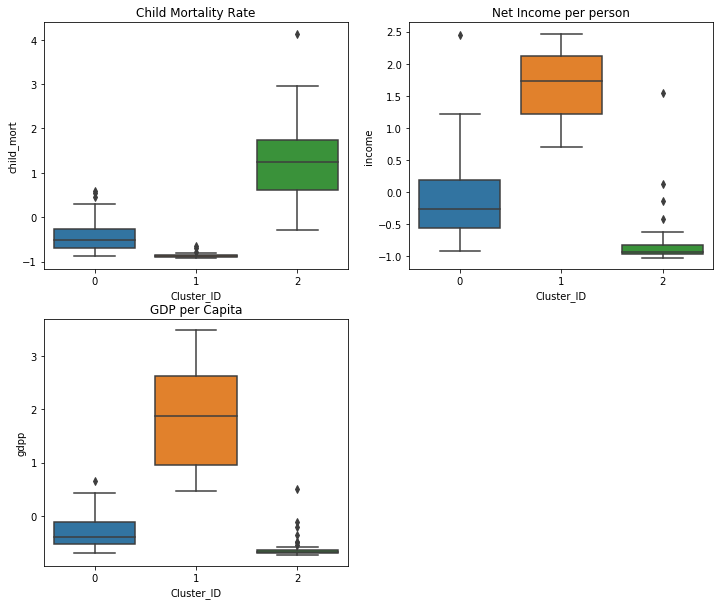

In [78]:
# Original Features:
plt.figure(figsize = (12, 10))
plt.subplot(221)
sns.boxplot(x='Cluster_ID', y='child_mort', data = countries_final)
plt.title('Child Mortality Rate')

plt.subplot(222)
sns.boxplot(x='Cluster_ID', y='income', data = countries_final)
plt.title('Net Income per person')

plt.subplot(223)
sns.boxplot(x='Cluster_ID', y='gdpp', data = countries_final)
plt.title('GDP per Capita')

It can be seen that the clusters are neatly differentiable based on the original features.<br>

**Cluster 2** represents the under-developed countries since they have a really high child mortality rate combined with a lower net income per person and a lower GDP per capita. These are the countries that need assistance to overcome their problems since they are not self sufficient in terms of financial resources.

**Cluster 1** represents the developed countries which enjoy a high income, higher GDP per capita and a really low child mortality rate.

**Cluster 0** represents the developing countries since they have a medium rate of child mortality, also their net income per person is significantly higher than the poor countries but at the same time significantly lower than the developed countries. The GDP per capita for these coutnries also follow the same pattern, i.e higher than the underdeveloped countries and lower than the developed countries.

**Let us now visulaize the Principal components to see the clusters formed**

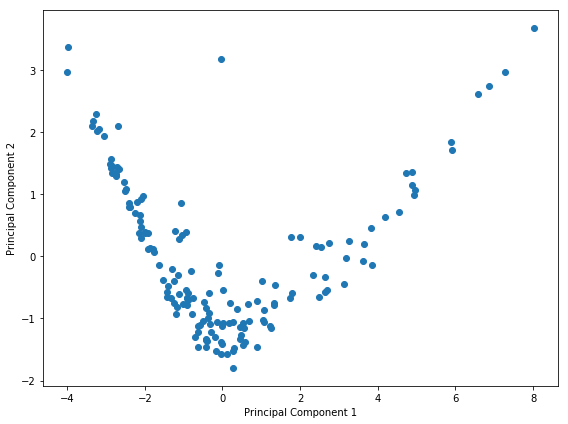

In [79]:
# PC1 and PC2:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(countries_final.PC1, countries_final.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
'''
for i, txt in enumerate(countries_final['country']):
    plt.annotate(txt, (countries_final.PC1[i],countries_final.PC2[i]))
'''
plt.tight_layout()
plt.show()

**Visualizing the original features to see the clusters.**

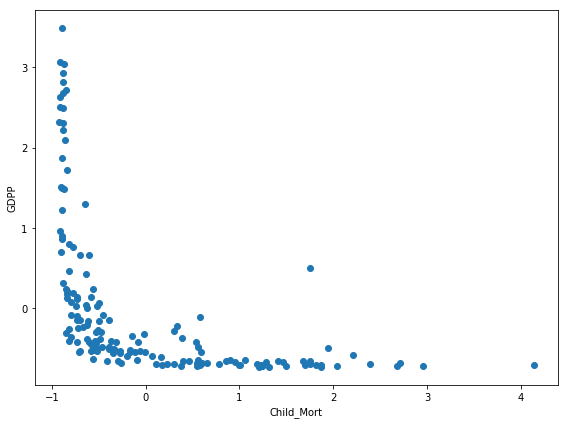

In [80]:
# Child mortality Vs GDPP:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(countries_final['child_mort'], countries_final['gdpp'])
plt.xlabel('Child_Mort')
plt.ylabel('GDPP')
'''
for i, txt in enumerate(countries_final['country']):
    plt.annotate(txt, (countries_final.PC1[i],countries_final.PC2[i]))
'''
plt.tight_layout()
plt.show()

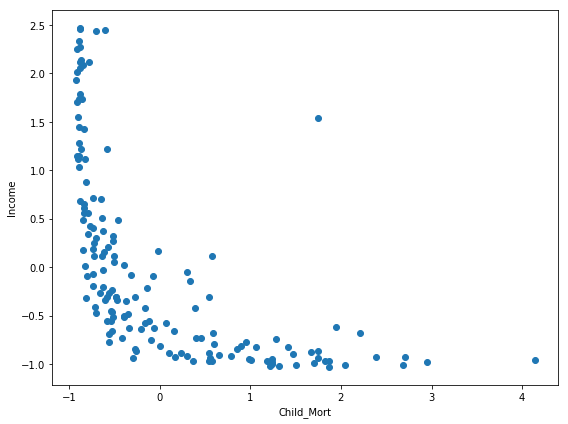

In [81]:
# Child mortality Vs Income:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(countries_final['child_mort'], countries_final['income'])
plt.xlabel('Child_Mort')
plt.ylabel('Income')
'''
for i, txt in enumerate(countries_final['country']):
    plt.annotate(txt, (countries_final.PC1[i],countries_final.PC2[i]))
'''
plt.tight_layout()
plt.show()

We can see that the clusters are clearly outlined.

Let us now focus on the **under-developed** countries in Cluster 2:

In [82]:
poor_countries = countries_final[countries_final['Cluster_ID'] == 2]
poor_countries.shape

(46, 14)

In [83]:
poor_countries.sort_values(['child_mort', 'income', 'gdpp'], ascending = False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,Cluster_ID
65,Haiti,4.136735,-0.605928,-0.579337,-0.608738,-0.961411,-0.223777,-4.300336,0.207638,-0.704230,-4.012789,2.967955,-1.803347,2
127,Sierra Leone,2.954294,-0.610377,-0.574711,-0.650501,-0.983147,0.869419,-1.704407,1.434613,-0.723496,-3.338838,2.184519,-0.053591,2
31,Chad,2.707952,-0.576215,-0.582960,-0.614215,-0.928030,-0.136321,-1.534368,2.346642,-0.687015,-3.267106,2.298053,-0.952378,2
30,Central African Republic,2.683318,-0.612247,-0.599184,-0.653298,-1.008920,-0.543828,-2.554602,1.441174,-0.720053,-3.350565,2.102076,-1.552039,2
94,Mali,2.387708,-0.598119,-0.586772,-0.634573,-0.932688,-0.324258,-1.194291,2.320397,-0.700860,-3.044493,1.943817,-1.011267,2
110,Nigeria,2.215268,-0.542530,-0.528017,-0.612027,-0.678063,8.945115,-1.080931,1.854540,-0.582041,-3.989994,3.368219,7.906776,2
109,Niger,2.042829,-0.609049,-0.599038,-0.645729,-1.014665,-0.493587,-1.273642,2.937165,-0.727232,-3.173869,2.048420,-1.164409,2
3,Angola,1.944292,-0.333493,-0.540442,-0.452688,-0.619840,1.353217,-1.126275,2.064504,-0.494135,-2.680948,2.106209,0.690726,2
24,Burkina Faso,1.870390,-0.604745,-0.584293,-0.645825,-0.966845,-0.097245,-1.375665,1.874224,-0.710603,-2.871575,1.560343,-0.760004,2
36,"Congo, Dem. Rep.",1.870390,-0.601255,-0.593038,-0.646476,-1.030579,1.204356,-1.421009,2.313836,-0.728258,-3.239837,2.019485,0.452650,2


Out of a total of 46 countries which we labelled as poor countries, the above mentioned countries have the highest child mortality rate in the world, also these countries have a really low GDP per capita coupled with a meagre income. This ends up being a vicious cycle of poverty wherein poverty and lack of resources leads to higher child mortality rates.